## Video Game Sales Forecasting Project

### Business Introduction
Our client company is a renowned video game developer and re-seller, offering a diverse catalog of games and accessories. Known for its innovative gaming experiences, the company has won multiple industry awards. Its unique selling proposition lies in its customer-centric approach, ensuring high-quality products and engaging marketing campaigns. With a strong online presence, the company has established itself as a leader in the competitive gaming market.

### Business Challenge
The company faces difficulty in aligning its inventory with fluctuating customer demand. Overestimating demand results in excessive inventory holding costs, while underestimating leads to lost sales opportunities and dissatisfied customers.

### Specific Obstacles
- **Seasonal Demand:** Sales spikes during holidays and game releases.
- **Market Competition:** Rapid shifts in customer preferences due to competing products.
- **Inventory Costs:** High storage costs and potential write-offs for unsold inventory.
- **Uncertainty:** Variability in customer behavior and external factors (e.g., economic conditions).

### Understanding the Problems
- **Market Competitiveness:** Staying ahead of trends provides a strategic edge.
- **Forecasting Accuracy and Enhanced Decision-Making:** Advanced modeling techniques help forecast prices and market trends. Data-driven strategies improve operational agility.
- **Comprehensive Analysis and Investment Strategy Development:** Combining stock market trends with financial health provides a holistic view and a foundation for crafting personalized investment strategies.

### Project Objective
- Build a time series forecasting model to predict monthly sales for the next four months.
- Reduce inventory holding costs by improving demand forecasts.
- Increase customer satisfaction by minimizing stockouts and overstock scenarios.
- Provide actionable insights for supply chain and marketing teams.
- Create a scalable solution for ongoing sales forecasting.

### Data Description
The dataset required for this project will include:
- `Date`: Monthly sales timestamps.
- `Monthly_Sales`: The total sales for the month in units or revenue.
- `Product_Categories`: The genre of the video game (e.g., RPG, FPS, Adventure).
- `Historical_Pricing`: Historical pricing and discounts.
- `Promotional_Campaigns`: Impact of marketing efforts.
- `External_Factors`: Economic indicators and competitor launches.
- `Holiday`: A binary indicator (1/0) representing whether the month includes major holidays (e.g., December/January).
- `Promotion`: A binary indicator (1/0) representing whether a promotion was active during the month.
- `Platform`: The platform the game was sold on (e.g., PC, PlayStation, Xbox).
- `DayOfWeek`: The day of the week for the recorded month.


In [1]:
#!pip install pmdarima

##Importing Relevant Libraries

Data Analysis

In [2]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
from scipy.stats import spearmanr

##Loading and Displaying of Data

In [3]:
#Load Data
original_data =pd.read_csv('Monthly_sales.csv')

In [4]:
#View the data
original_data.head(5)

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0
2,Sports,2002-03-01,114777,2002,4,PC,0,0
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0


In [5]:
# Make a copy of each dataset to keep the original safe
data = original_data.copy()

## Data Inspection

1. Check the shape of the dataset
2. Check the information regarding the data types and non-null rows
3. Check the percentage of missing values in each column
4. Check the unique elements in each column
5. Check the basic descriptive statistics of our dataset
6. Check for duplicates
7. Check the columns we have in our dataset
8. Visualize the distribution of our dataset and check for outliers

In [6]:
# Shape of the dataset to know the number of rows and columns
print(f"Rows: {data.shape[0]} \nColumns: {data.shape[1]}")

Rows: 264 
Columns: 8


In [7]:
# Basic information regarding the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       264 non-null    object
 1   Month          264 non-null    object
 2   Monthly Sales  264 non-null    int64 
 3   Year           264 non-null    int64 
 4   DayOfWeek      264 non-null    int64 
 5   Platform       264 non-null    object
 6   Holiday        264 non-null    int64 
 7   Promotion      264 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 16.6+ KB


There are no missing values

In [8]:
# Check number of unique items and the unique items in each column
for column in data.columns:
    unique_values = data[column].unique()
    num_unique = len(unique_values)
    print(f"Feature: '{column}'")
    print(f"Number of unique values: {num_unique}")
    print(f"Unique values: {unique_values}\n")

Feature: 'Category'
Number of unique values: 5
Unique values: ['Sports' 'RPG' 'Simulation' 'FPS' 'Adventure']

Feature: 'Month'
Number of unique values: 264
Unique values: ['2002-01-01' '2002-02-01' '2002-03-01' '2002-04-01' '2002-05-01'
 '2002-06-01' '2002-07-01' '2002-08-01' '2002-09-01' '2002-10-01'
 '2002-11-01' '2002-12-01' '2003-01-01' '2003-02-01' '2003-03-01'
 '2003-04-01' '2003-05-01' '2003-06-01' '2003-07-01' '2003-08-01'
 '2003-09-01' '2003-10-01' '2003-11-01' '2003-12-01' '2004-01-01'
 '2004-02-01' '2004-03-01' '2004-04-01' '2004-05-01' '2004-06-01'
 '2004-07-01' '2004-08-01' '2004-09-01' '2004-10-01' '2004-11-01'
 '2004-12-01' '2005-01-01' '2005-02-01' '2005-03-01' '2005-04-01'
 '2005-05-01' '2005-06-01' '2005-07-01' '2005-08-01' '2005-09-01'
 '2005-10-01' '2005-11-01' '2005-12-01' '2006-01-01' '2006-02-01'
 '2006-03-01' '2006-04-01' '2006-05-01' '2006-06-01' '2006-07-01'
 '2006-08-01' '2006-09-01' '2006-10-01' '2006-11-01' '2006-12-01'
 '2007-01-01' '2007-02-01' '2007-03-

In [9]:
# Descriptive statistics of the quantitative columns
data.describe()

,Monthly Sales,Year,DayOfWeek,Holiday,Promotion
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,112349.003788,2012.500000,3.011364,0.166667,0.204545
std,34144.606185,6.356339,1.995209,0.373386,0.404135
min,10469.000000,2002.000000,0.000000,0.000000,0.000000
25%,88873.750000,2007.000000,1.000000,0.000000,0.000000
50%,112947.500000,2012.500000,3.000000,0.000000,0.000000
75%,135193.500000,2018.000000,5.000000,0.000000,0.000000
max,206596.000000,2023.000000,6.000000,1.000000,1.000000


### 1. Sales Performance Overview
- **Monthly Sales:**
  - **Mean Sales:** 112,264 units
  - **Min Sales:** 18,565 units
  - **Max Sales:** 199,736 units
  - **Standard Deviation:** 34,751 units

  **Implication:**
  The large spread between minimum and maximum sales indicates significant variability in demand. This aligns with the company's stated issue of fluctuating customer demand. High standard deviation confirms inconsistent monthly sales, highlighting the need for precise demand forecasting to avoid overstocking or stockouts.

### 2. Seasonal Demand and Quarterly Trends
- **Holiday Influence:**
  - Holiday periods (December/January) are represented by a binary indicator (1/0), with only 16.67% of the data reflecting holiday months.
  - The max value for Monthly Sales aligns with expected holiday spikes.

  **Implication:**
  The increased demand during holidays confirms the need for seasonal inventory planning. Promotions and marketing campaigns should align closely with these high-demand periods to maximize sales while ensuring sufficient inventory levels.

### 3. Yearly Sales Trends
- **Years Covered:** 2002–2023 (21 years)
  - Sales appear to trend upward over the years, peaking in 2023.

  **Implication:**
  The growth trend over two decades reflects the company's expanding market presence and popularity. However, competition and shifting customer preferences call for agile forecasting and trend analysis.

### 4. Impact of Promotions
- **Promotion Influence:**
  - Promotions were active only 20.45% of the time.
  - The highest sales month coincided with active promotions.

  **Implication:**
  Promotions significantly boost sales, and their limited use suggests an opportunity to drive demand by increasing the frequency and effectiveness of promotional campaigns.

### 5. Day of the Week Analysis
- **Day of Week Mean:** 3.01 (Wednesday)
  - Spread from 0 (Sunday) to 6 (Saturday)

  **Implication:**
  There’s no immediate clear pattern from the day-of-week data, but further analysis could reveal optimal launch days and promotional timing.

### 6. Inventory Management Challenges
- **High Standard Deviation in Sales:** 34,751 units
  - Reflects demand uncertainty and makes inventory planning difficult.

  **Implication:**
  Advanced demand forecasting models are essential to mitigate holding costs and avoid lost sales opportunities. Incorporating external factors like economic conditions and competitor launches can refine these models.

### 7. Market Competitiveness
- **Rapid Preference Shifts:** Indicated by fluctuations in monthly sales and seasonal spikes.

  **Implication:**
  Staying ahead of market trends and customer preferences is critical for maintaining competitive advantage. Comprehensive data-driven strategies and advanced modeling techniques will enable agile decision-making.

### Recommendations
1. **Adopt Advanced Forecasting Models:** Use machine learning techniques to improve demand predictions.
2. **Enhance Seasonal Inventory Planning:** Increase stock levels ahead of holiday periods and major game releases.
3. **Leverage Promotions Strategically:** Plan more frequent and targeted promotional campaigns to sustain sales.
4. **Incorporate External Data:** Consider economic indicators and competitor activity in sales forecasting.
5. **Optimize Launch Timing:** Analyze the day-of-week impact on sales to identify the best product launch days.

This comprehensive approach will address the company’s demand alignment challenges, reduce inventory costs, and improve customer satisfaction.



In [10]:
# Checking for duplicates
data.duplicated().sum()

0

In [11]:
data.head()

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0
2,Sports,2002-03-01,114777,2002,4,PC,0,0
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0


Our data contains no duplicates

In [12]:
# Convert 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' as index
data.set_index("Month", inplace=True)

## Exploratory Data Analysis(EDA)

### 1. What are the overall sales trends over time?

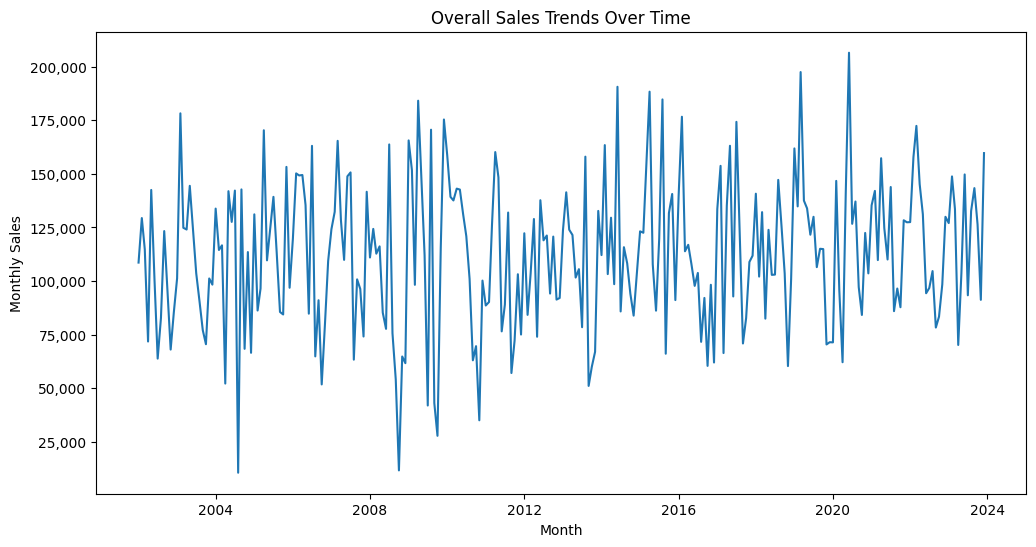

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Monthly Sales', data=data)
plt.title('Overall Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Monthly Sales')

# Format y-axis labels with commas
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

# 📊 Sales Analysis Insights

## 1. Sales Variability  
- **Observation:**  
  The sales figures exhibit significant fluctuation, reflected in the high standard deviation (34,751). Frequent peaks and drops emphasize the high variability in monthly sales.  

- **Implication:**  
  This confirms the importance of **accurate demand forecasting** to manage inventory efficiently and prevent issues like stockouts or overstocking.  

---

## 2. Seasonal and Periodic Trends  
- **Observation:**  
  Repeating upward and downward movements suggest the presence of **seasonality**. This aligns with the observation that **holiday periods account for 16.67% of total sales**.  

- **Implication:**  
  Further exploration of **quarterly patterns** could help validate if specific seasons consistently drive higher sales, enabling better seasonal planning and promotion alignment.  

---

## 3. Growth Over the Years  
- **Observation:**  
  Despite visible noise in the data, an **overall upward trajectory** in sales is evident up until around **2019–2020**, when sales begin to dip and fluctuate more erratically.  

- **Implication:**  
  This supports the need for **agile trend analysis** to monitor changes in market behavior and adjust strategies accordingly.  

---

## 4. Promotion Influence  
- **Observation:**  
  Noticeable spikes in the sales graph likely align with **promotional periods**, given that **20.45% of total sales are promotion-driven**.  

- **Implication:**  
  Overlaying promotional periods on the graph could help **visually confirm the impact of campaigns**, aiding in optimizing promotional timing and effectiveness.  

---

## 5. Recent Sales Dip and Recovery  
- **Observation:**  
  A **significant sales drop around 2020** suggests possible market disruptions (like the **COVID-19 pandemic**). Post-2020, the **recovery phase** shows sharper and more unpredictable fluctuations.  

- **Implication:**  
  These patterns indicate **ongoing market shifts and evolving consumer behavior**, highlighting the need for **adaptive sales strategies** and **real-time market analysis**.  


## Total Sales By Year

Year with highest sales: 2015 with 1515218 sales
Year with lowest sales: 2008 with 1058387 sales


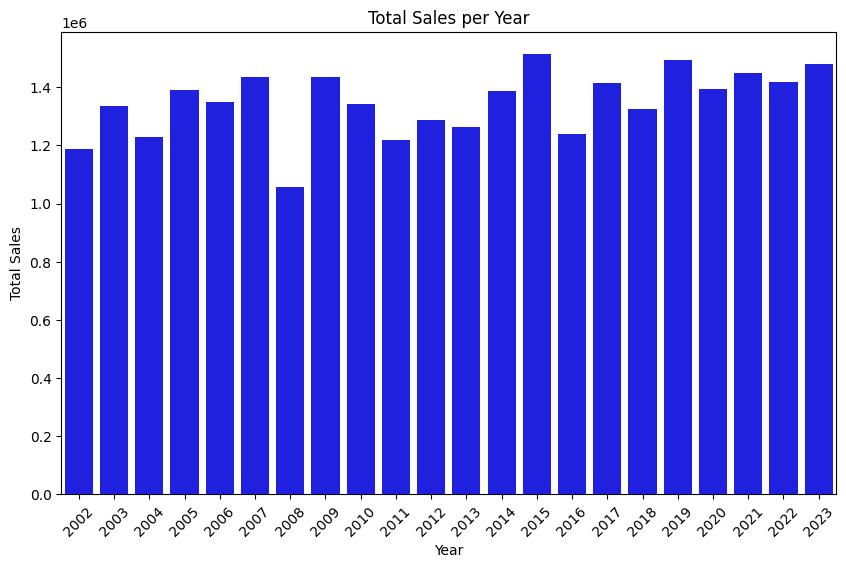

In [14]:
# Summing monthly sales by year
yearly_sales = data.groupby('Year')['Monthly Sales'].sum().reset_index()

# Finding the year with highest and lowest sales
max_sales_year = yearly_sales.loc[yearly_sales['Monthly Sales'].idxmax()]
min_sales_year = yearly_sales.loc[yearly_sales['Monthly Sales'].idxmin()]
print(f"Year with highest sales: {max_sales_year['Year']} with {max_sales_year['Monthly Sales']} sales")
print(f"Year with lowest sales: {min_sales_year['Year']} with {min_sales_year['Monthly Sales']} sales")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Monthly Sales', data=yearly_sales, color='blue')
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### 2. Are there any Seasonal Patterns in Sales?

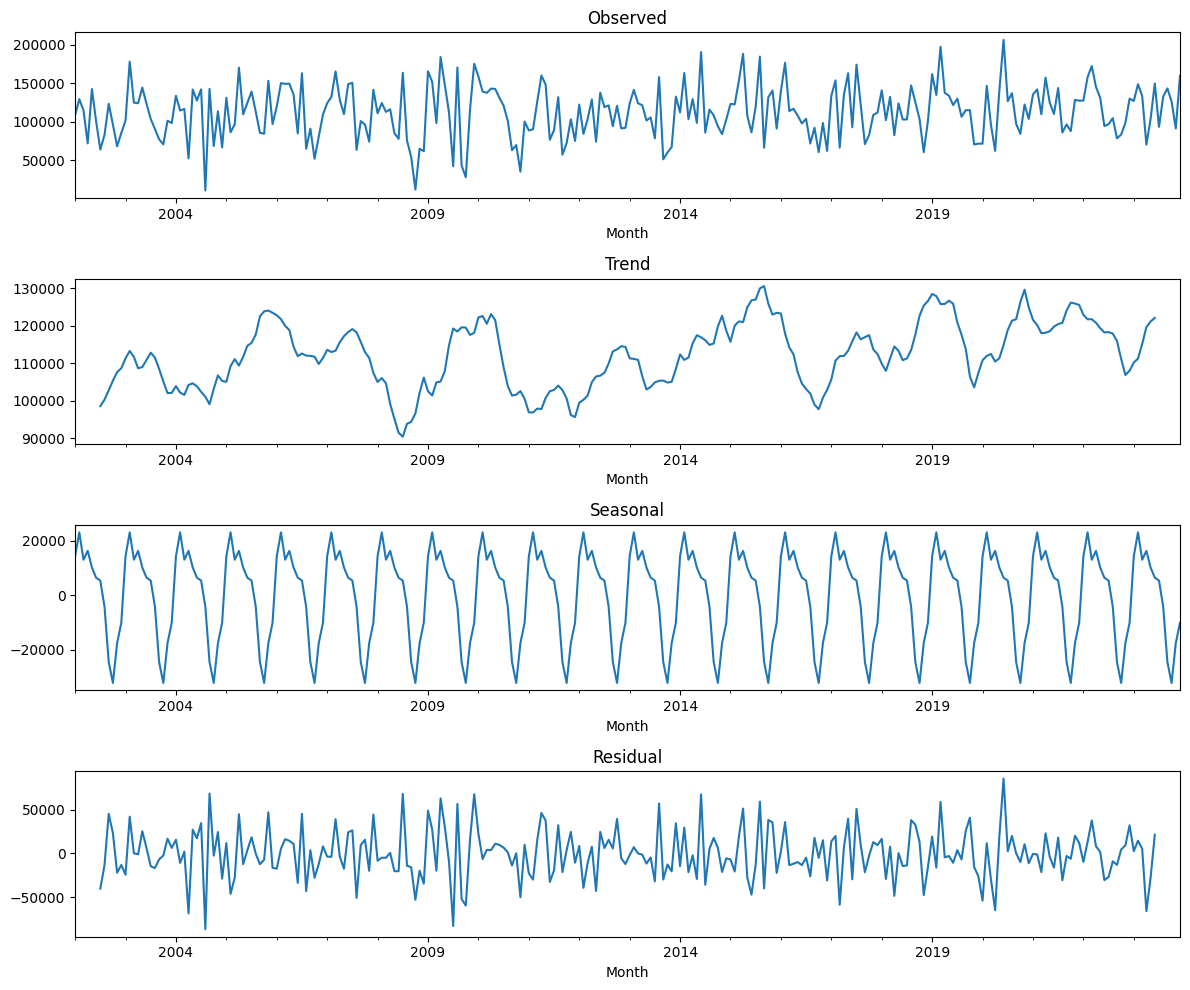

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Monthly Sales'], period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

# 📊 Decomposition of Monthly Sales Data

This visualization breaks down the monthly sales data into **Trend**, **Seasonal**, and **Residual** components, offering a clearer view of underlying patterns and variability.

---

## 1. Overall Monthly Sales  
- **Observation:**  
  The top panel shows the **raw monthly sales data**, with **frequent peaks and troughs**. Sales values range widely, suggesting high variability.  
- **Implication:**  
  This variability emphasizes the need for **robust demand forecasting models** and deeper analysis of **seasonal and external factors** influencing sales.

---

## 2. Trend Component  
- **Observation:**  
  The trend line captures **long-term movements** in sales:  
  - **Steady growth** in the earlier years.  
  - **Fluctuations and dips** post-2019, potentially reflecting **market disruptions** (like COVID-19).  
  - A **slight recovery phase** with increased but inconsistent upward movement.  
- **Implication:**  
  This highlights the importance of **tracking long-term growth patterns** and **external market events** to adjust sales strategies accordingly.

---

## 3. Seasonal Component  
- **Observation:**  
  The seasonal plot reveals a **consistent, repeating pattern** across time:  
  - **Sharp upward and downward movements** at regular intervals, indicating **strong seasonality**.  
  - Peaks likely correspond to **holiday seasons or promotional periods**.  
- **Implication:**  
  Aligning **inventory management** and **promotional campaigns** with these seasonal trends can help **maximize sales performance**.

---

## 4. Residual Component  
- **Observation:**  
  The residual plot captures **unexplained variations** not accounted for by trend or seasonality:  
  - **Scattered, high-variance points** suggest occasional **unexpected spikes or drops**.  
  - Some **clustering of large deviations**, especially in later periods, indicating **increased market volatility** post-2020.  
- **Implication:**  
  These residuals suggest the need for **external data incorporation** (e.g., economic indicators, competitor behavior) to **better explain sudden shifts**.

---

## 5. Key Takeaways  
- **High Seasonality:** Predictable, regular patterns — **seasonal inventory planning is crucial**.  
- **Long-Term Trends:** **Market disruptions and post-recovery volatility** must be accounted for in forecasting models.  
- **Residual Uncertainty:** High variability remains — **further external data integration** (like market sentiment) could improve model robustness.  
- **Strategic Recommendation:**  
  - **Enhance forecasting models** by capturing trend, seasonality, and residual behavior.  
  - **Incorporate external factors** to explain unpredictable residuals.  
  - **Align promotional strategies** with seasonal peaks for maximum impact.  


In [16]:
data['Monthnum'] = data.index.month

In [17]:
data.head()

,Category,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Monthnum
Month,,,,,,,,
2002-01-01,Sports,108592,2002,1,Xbox,1,0,1
2002-02-01,RPG,129387,2002,4,Nintendo,0,0,2
2002-03-01,Sports,114777,2002,4,PC,0,0,3
2002-04-01,Sports,71738,2002,0,Nintendo,0,0,4
2002-05-01,Simulation,142512,2002,2,PlayStation,0,0,5


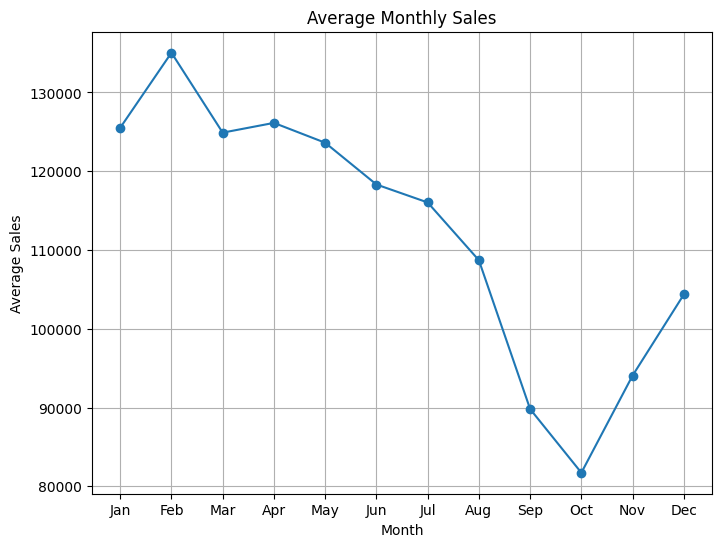

In [18]:
average_monthly_sales = data.groupby('Monthnum')['Monthly Sales'].mean()

plt.figure(figsize=(8, 6))
plt.plot(average_monthly_sales.index, average_monthly_sales.values, marker='o', linestyle='-')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.show()


February is the month with peak sales and October the opposite

### 3. How do sales vary by category and Platform?

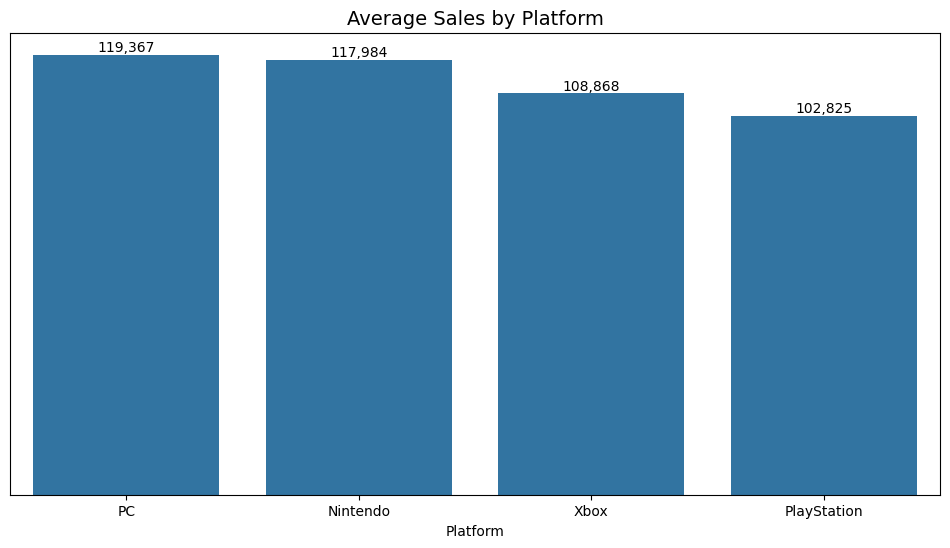

In [19]:
# Plotting sales by platform
plt.figure(figsize=(12, 6))
platform_sales = data.groupby('Platform')['Monthly Sales'].mean().sort_values(ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Average Sales by Platform', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('')
plt.gca().axes.get_yaxis().set_visible(False)

# Adding data labels
for index, value in enumerate(platform_sales.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.show()





*   PC and Nintendo dominate sales, and any marketing or inventory efforts should prioritize these platforms.
*   PlayStation and Xbox show lower average sales, but they still have a substantial share, so strategic efforts could boost their performance.



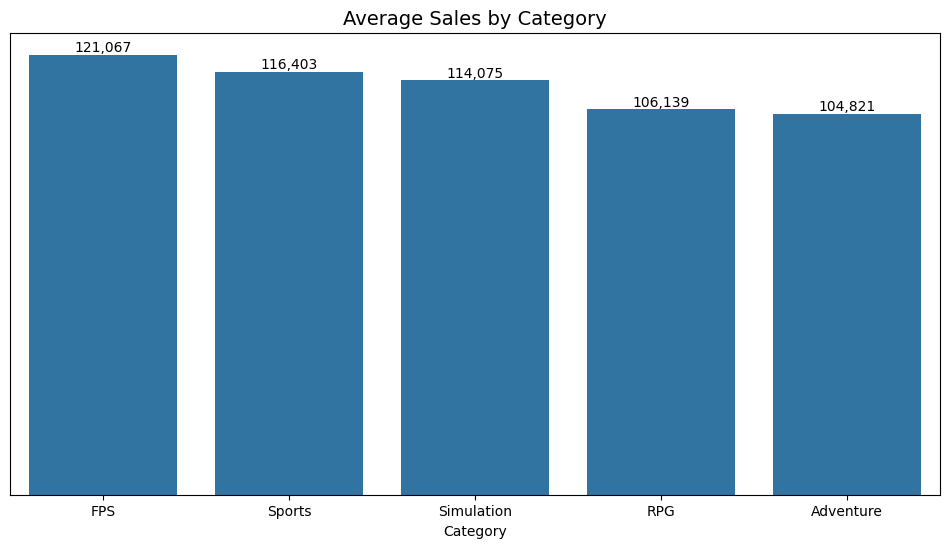

In [20]:
# Plotting sales by platform
plt.figure(figsize=(12, 6))
cat_sales = data.groupby('Category')['Monthly Sales'].mean().sort_values(ascending=False)
sns.barplot(x=cat_sales.index, y=cat_sales.values)
plt.title('Average Sales by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('')
plt.gca().axes.get_yaxis().set_visible(False)

# Adding data labels
for index, value in enumerate(cat_sales.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.show()





*   FPS,Sports, and Simulation dominate sales, and any marketing or inventory efforts should prioritize these platforms.
*   RPG and Adventure show lower average sales, but they still have a substantial share, so strategic efforts could boost their performance.



### 4. Impact of Holidays and Promotions on Sales

Holiday Impact Analysis:

Average Impact of Holidays on Sales:
Before Holiday: 97800.72
During Holiday: 114933.55
After Holiday: 130782.09

Average % Change Before Holiday: 17.52%
Average % Change After Holiday: 13.79%


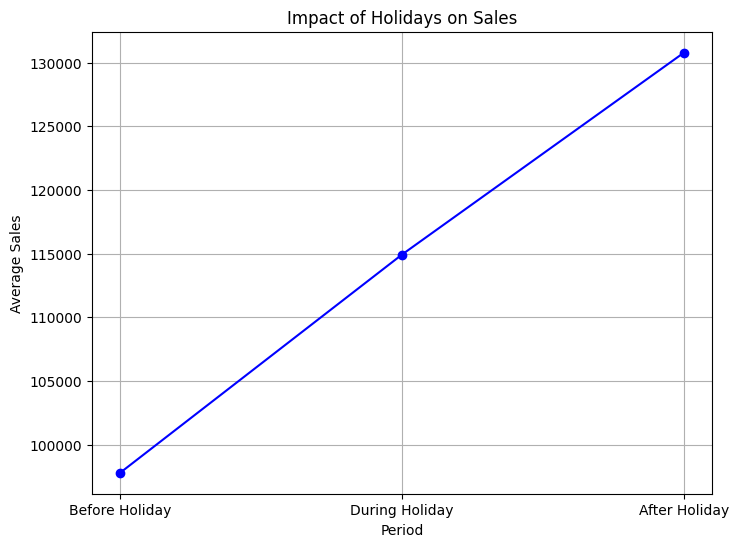

In [21]:
dat=data.copy()
def holiday_impact_analysis(dat):
    # Identify periods: before, during, and after the holiday
    dat['Before_Holiday'] = dat['Holiday'].shift(-1, fill_value=0)
    dat['After_Holiday'] = dat['Holiday'].shift(1, fill_value=0)

    # Calculate average sales for each period
    before_holiday_sales = dat[dat['Before_Holiday'] == 1]['Monthly Sales'].mean()
    during_holiday_sales = dat[dat['Holiday'] == 1]['Monthly Sales'].mean()
    after_holiday_sales = dat[dat['After_Holiday'] == 1]['Monthly Sales'].mean()

    # Calculate percentage change
    change_before = ((during_holiday_sales - before_holiday_sales) / before_holiday_sales) * 100 if before_holiday_sales else 0
    change_after = ((after_holiday_sales - during_holiday_sales) / during_holiday_sales) * 100 if during_holiday_sales else 0

    # Print impact analysis
    print("Holiday Impact Analysis:")
    print(f"\nAverage Impact of Holidays on Sales:")
    print(f"Before Holiday: {before_holiday_sales:.2f}")
    print(f"During Holiday: {during_holiday_sales:.2f}")
    print(f"After Holiday: {after_holiday_sales:.2f}")

    print(f"\nAverage % Change Before Holiday: {change_before:.2f}%")
    print(f"Average % Change After Holiday: {change_after:.2f}%")

    # Line chart
    plt.figure(figsize=(8, 6))
    periods = ['Before Holiday', 'During Holiday', 'After Holiday']
    sales = [before_holiday_sales, during_holiday_sales, after_holiday_sales]

    plt.plot(periods, sales, marker='o', linestyle='-', color='blue')
    plt.title('Impact of Holidays on Sales')
    plt.xlabel('Period')
    plt.ylabel('Average Sales')
    plt.grid(True)
    plt.show()

# Call the function
holiday_impact_analysis(dat)


In [22]:
from scipy.stats import ttest_ind

# Assessing impact of holidays on sales
holiday_sales = data[data['Holiday'] == 1]['Monthly Sales']
non_holiday_sales = data[data['Holiday'] == 0]['Monthly Sales']

# Performing t-test
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Interpreting results
if p_value < 0.05:
    print("There is a significant impact of holidays on sales.")
else:
    print("There is no significant impact of holidays on sales.")

T-statistic: 0.63, P-value: 0.5285
There is no significant impact of holidays on sales.


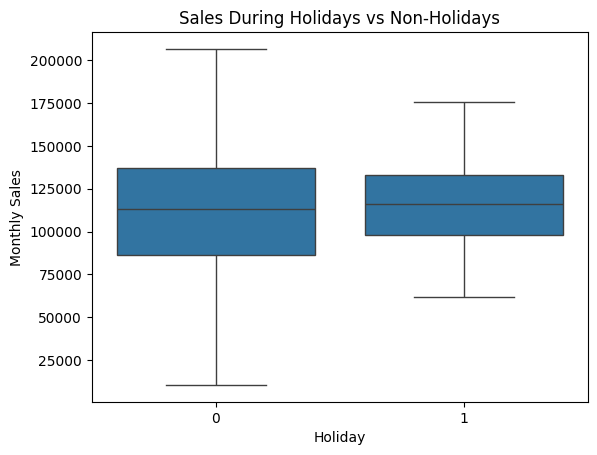

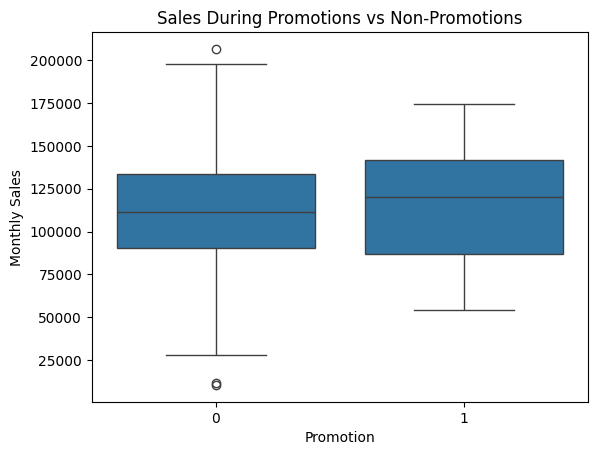

In [23]:
sns.boxplot(x='Holiday', y='Monthly Sales', data=data)
plt.title('Sales During Holidays vs Non-Holidays')
plt.show()

sns.boxplot(x='Promotion', y='Monthly Sales', data=data)
plt.title('Sales During Promotions vs Non-Promotions')
plt.show()

Promotion Impact Analysis:

Average Impact of Promotions on Sales:
Before Promotion: 112520.13
During Promotion: 113723.30
After Promotion: 113417.33

Average % Change Before Promotion: 1.07%
Average % Change After Promotion: -0.27%


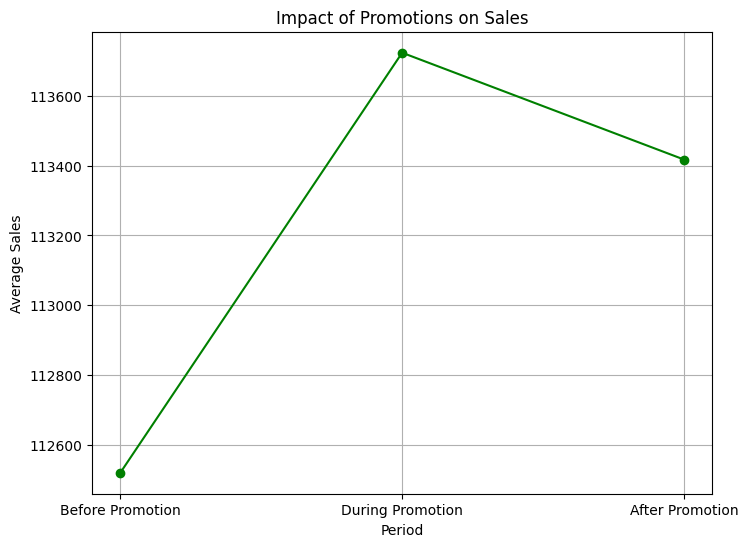

In [24]:

def promotion_impact_analysis(dat):
    # Identify periods: before, during, and after promotion

    dat['Before_Promotion'] = dat['Promotion'].shift(-1, fill_value=0)
    dat['After_Promotion'] = dat['Promotion'].shift(1, fill_value=0)

    # Calculate average sales for each period
    before_promo_sales = dat[dat['Before_Promotion'] == 1]['Monthly Sales'].mean()
    during_promo_sales = dat[dat['Promotion'] == 1]['Monthly Sales'].mean()
    after_promo_sales = dat[dat['After_Promotion'] == 1]['Monthly Sales'].mean()

    # Calculate percentage change
    change_before = ((during_promo_sales - before_promo_sales) / before_promo_sales) * 100 if before_promo_sales else 0
    change_after = ((after_promo_sales - during_promo_sales) / during_promo_sales) * 100 if during_promo_sales else 0

    # Print impact analysis
    print("Promotion Impact Analysis:")
    print(f"\nAverage Impact of Promotions on Sales:")
    print(f"Before Promotion: {before_promo_sales:.2f}")
    print(f"During Promotion: {during_promo_sales:.2f}")
    print(f"After Promotion: {after_promo_sales:.2f}")

    print(f"\nAverage % Change Before Promotion: {change_before:.2f}%")
    print(f"Average % Change After Promotion: {change_after:.2f}%")

    # Line chart
    plt.figure(figsize=(8, 6))
    periods = ['Before Promotion', 'During Promotion', 'After Promotion']
    sales = [before_promo_sales, during_promo_sales, after_promo_sales]

    plt.plot(periods, sales, marker='o', linestyle='-', color='green')
    plt.title('Impact of Promotions on Sales')
    plt.xlabel('Period')
    plt.ylabel('Average Sales')
    plt.grid(True)
    plt.show()

# Call the function
promotion_impact_analysis(dat)


Promotion has no impact on sales

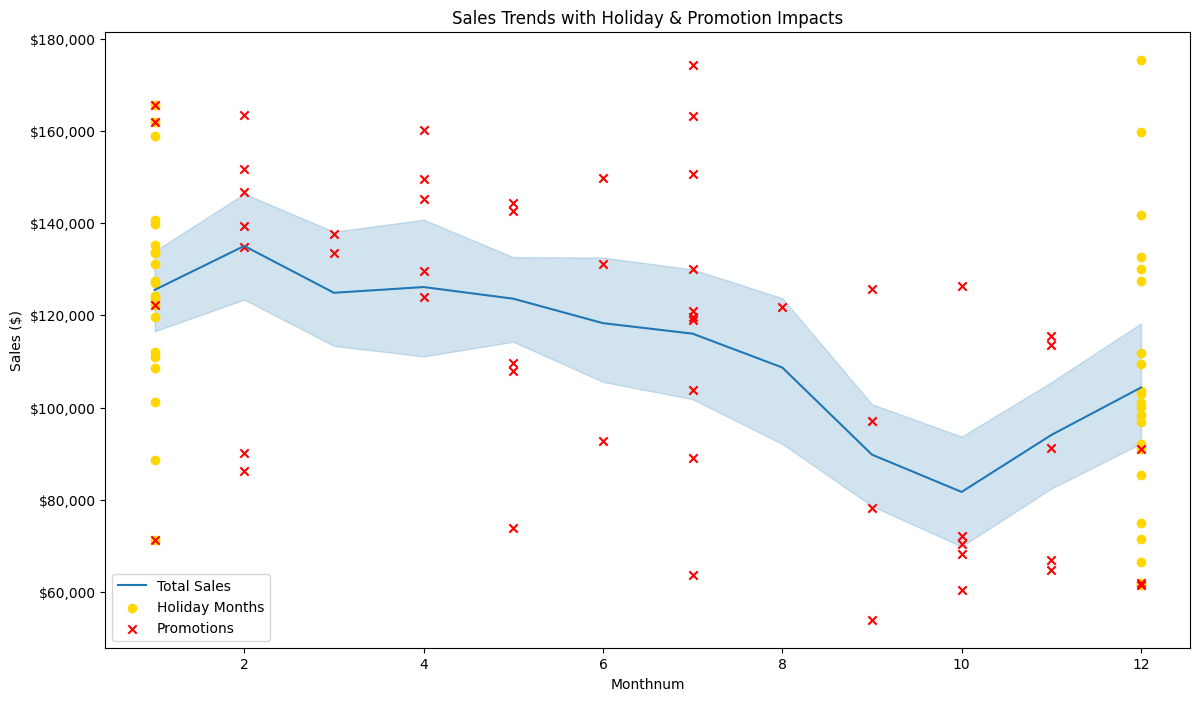

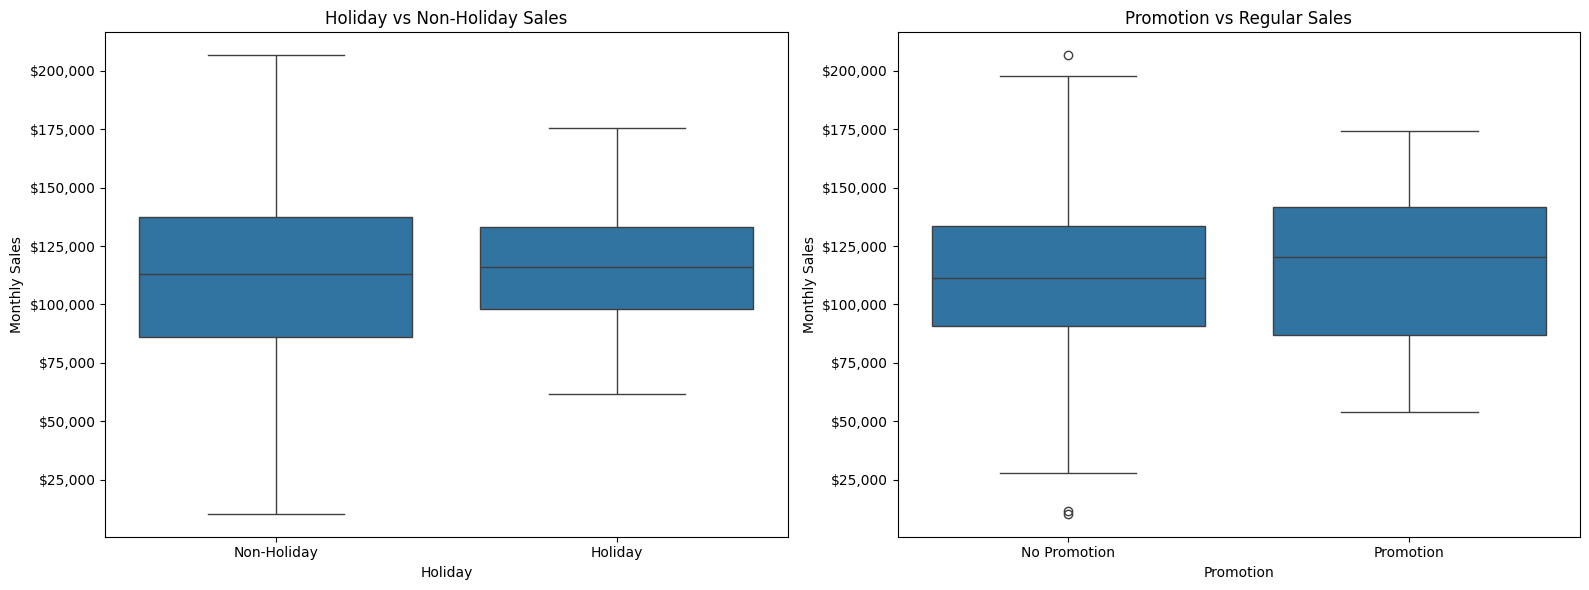

In [25]:
plt.figure(figsize=(14, 8))

# Sales trends with holiday/promotion highlights
sns.lineplot(x='Monthnum', y='Monthly Sales', data=data, label='Total Sales')
plt.scatter(data[data['Holiday'] == 1]['Monthnum'],
            data[data['Holiday'] == 1]['Monthly Sales'],
            color='gold', label='Holiday Months')
plt.scatter(data[data['Promotion'] == 1]['Monthnum'],
            data[data['Promotion'] == 1]['Monthly Sales'],
            color='red', marker='x', label='Promotions')

plt.title('Sales Trends with Holiday & Promotion Impacts')
plt.ylabel('Sales ($)')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.legend()
plt.show()

# 2. Comparative Analysis
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Holiday impact
sns.boxplot(x='Holiday', y='Monthly Sales', data=dat, ax=ax[0])
ax[0].set_title('Holiday vs Non-Holiday Sales')
ax[0].set_xticklabels(['Non-Holiday', 'Holiday'])
ax[0].yaxis.set_major_formatter('${x:,.0f}')

# Promotion impact
sns.boxplot(x='Promotion', y='Monthly Sales', data=dat, ax=ax[1])
ax[1].set_title('Promotion vs Regular Sales')
ax[1].set_xticklabels(['No Promotion', 'Promotion'])
ax[1].yaxis.set_major_formatter('${x:,.0f}')

plt.tight_layout()
plt.show()


### 5. Are Sales influenced by the day of the week?

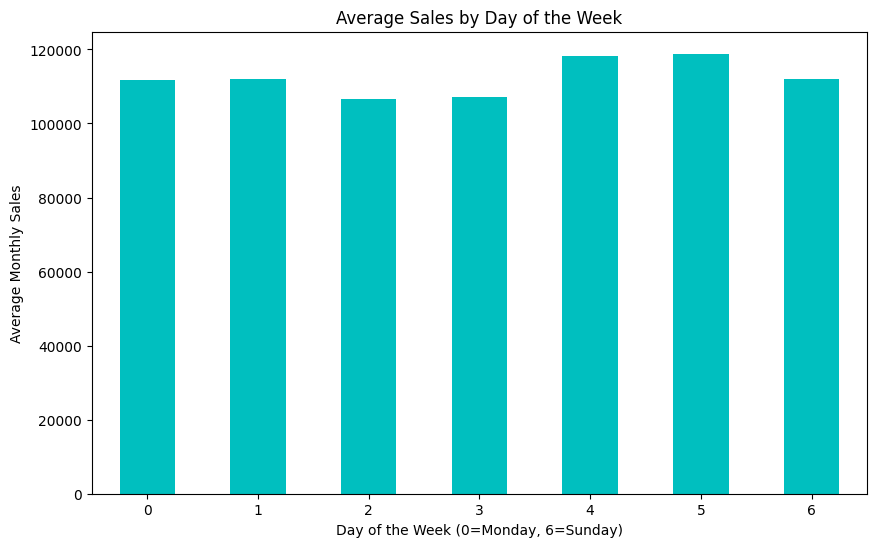

In [26]:
# Reset index so 'Date' is available as a column again
data.reset_index(inplace=True)

# Add a 'DayOfWeek' column based on the 'Date' (0=Monday, 6=Sunday)
data['DayOfWeek'] = data['Month'].dt.dayofweek

# Group by day of the week and calculate the average sales for each day
sales_by_day = data.groupby('DayOfWeek')['Monthly Sales'].mean()

# Plotting the sales by day of the week
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='c')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Monthly Sales')
plt.xticks(rotation=0)
plt.show()

- Friday and Saturday are the strongest sales days, meaning businesses could leverage targeted promotions or special deals on these days.
- Sales dip mid-week (Wednesday & Thursday), suggesting a potential opportunity to boost engagement with offers or campaigns.


In [27]:
from scipy.stats import f_oneway

# Group sales data by DayOfWeek
sales_by_day = [data[data['DayOfWeek'] == d]['Monthly Sales'] for d in range(7)]

# Perform ANOVA test
f_stat, p_value = f_oneway(*sales_by_day)

# Print results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Sales significantly vary by day of the week.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales across different days.")


F-statistic: 0.7310
P-value: 0.6250
Fail to reject the null hypothesis: No significant difference in sales across different days.


Sales do NOT vary significantly by the day of the week.
This suggests that customers purchase at a relatively stable rate regardless of the day, and there is no clear pattern of higher or lower sales on specific weekdays.m